## Análisis de Series Temporales - Laboratorio 1

Fernando E. Mancuso

In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
dataset=pd.read_csv('Telefonia_movil.csv', parse_dates=True, dayfirst=True, thousands='.')

In [5]:
dataset["Quarter"] = dataset["Año"].map(str) + "-" + (dataset["Trimestre"]*3-2).map(str)

In [6]:
dataset["Quarter"].head()

0     2013-1
1     2013-4
2     2013-7
3    2013-10
4     2014-1
Name: Quarter, dtype: object

In [7]:
dataset["Quarter"] = pd.to_datetime(dataset["Quarter"])

In [8]:
dataset = dataset.set_index("Quarter")

In [9]:
dataset.index = dataset.index.to_period(freq='Q')

In [10]:
dataset.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
Quarter,,,,,,
2013Q1,2013,1,8785943,6582117,15368060,Ene-Mar 2013
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2013Q3,2013,3,10315484,7335154,17650638,Jul-Sept 2013
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013
2014Q1,2014,1,10128751,5799223,15927974,Ene-Mar 2013


For univariate time series modelling, it is better to work with a pandas series rather than dataframe. 

In [11]:
y1 = dataset['Minutos pospago salientes (miles)']
y2 = dataset['Minutos prepago salientes (miles)']

In [12]:
y1.head()

Quarter
2013Q1     8785943
2013Q2     9512689
2013Q3    10315484
2013Q4     9809515
2014Q1    10128751
Freq: Q-DEC, Name: Minutos pospago salientes (miles), dtype: int64

In [13]:
y2.head()

Quarter
2013Q1    6582117
2013Q2    7108640
2013Q3    7335154
2013Q4    6250549
2014Q1    5799223
Freq: Q-DEC, Name: Minutos prepago salientes (miles), dtype: int64

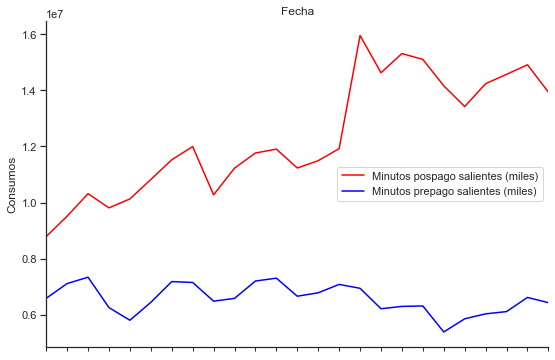

In [14]:
fig, ax= plt.subplots(figsize=(9,6))
y1.plot(color='r')
y2.plot(color='b')
ax.set_xlabel('')
ax.set_ylabel('Consumos')
ax.set_title('Fecha')
ax.set_xticks([])
plt.legend(loc='center right')
sns.despine()
plt.show()

## Random walk


In [15]:
h = 6
test1=pd.period_range(start=y1.index[-1]+1, periods=h, freq='Q')
pred1=pd.Series(np.repeat(y1.iloc[-1], h), index=test1)

In [16]:
h = 6
test2=pd.period_range(start=y2.index[-1]+1, periods=h, freq='Q')
pred2=pd.Series(np.repeat(y2.iloc[-1], h), index=test1)

In [17]:
resid1=y1-y1.shift(1)
sigma1 = resid1.std()
print("Desviacion estandar de los errores:" + str(round(sigma1,0)))

Desviacion estandar de los errores:1111027.0


In [18]:
resid2=y2-y2.shift(1)
sigma2 = resid2.std()
round(sigma2,0)

510833.0

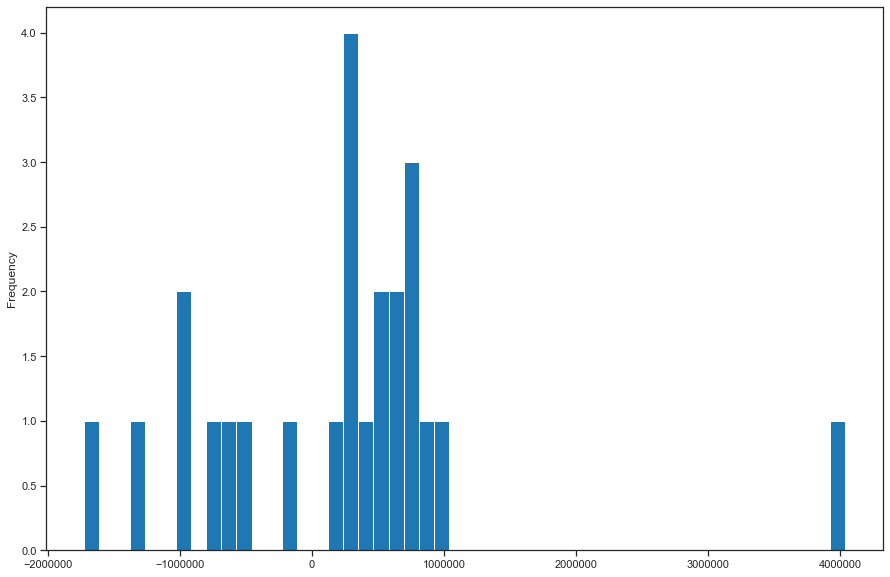

In [19]:
resid1.plot.hist(bins=50);

La distribucion de los residuos no es normal

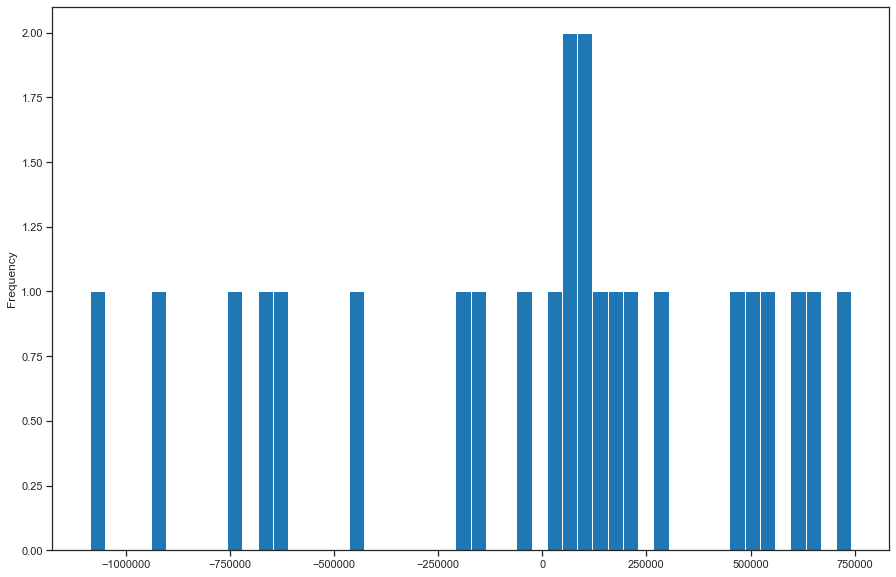

In [20]:
resid2.plot.hist(bins=50);

Intervalos de predicción - Serie Postpago

In [21]:
intv1 = pd.concat([pred1-stats.norm.ppf(0.975)*sigma1*np.sqrt(np.arange(1,h+1)),
                   pred1+stats.norm.ppf(0.975)*sigma1*np.sqrt(np.arange(1,h+1))], axis=1)
intv1.round(3)

,0,1
2019Q2,1.175970e+07,1.611484e+07
2019Q3,1.085772e+07,1.701682e+07
2019Q4,1.016560e+07,1.770894e+07
2020Q1,9.582125e+06,1.829242e+07
2020Q2,9.068070e+06,1.880647e+07
2020Q3,8.603329e+06,1.927121e+07


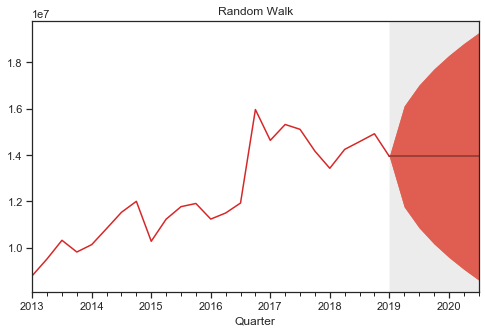

In [22]:
from plotting import fanchart
 
point_pred1 = (intv1[0]+intv1[1])/2

fig, ax = fanchart(y1,point_pred1,intv1,intv1,intv1 )
ax.set_title('Random Walk')

plt.show()

#### Serie Prepago

In [23]:
intv2 = pd.concat([pred2-stats.norm.ppf(0.975)*sigma2*np.sqrt(np.arange(1,h+1)),
                   pred2+stats.norm.ppf(0.975)*sigma2*np.sqrt(np.arange(1,h+1))], axis=1)

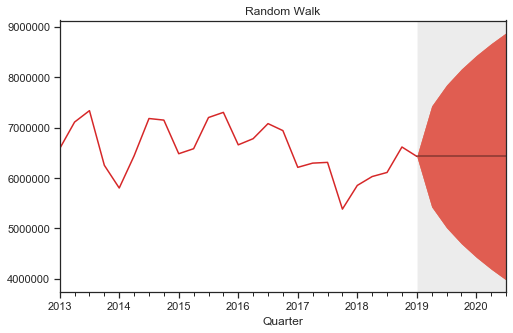

In [24]:
point_pred2 = (intv2[0]+intv2[1])/2

fig, ax = fanchart(y2,point_pred2,intv2,intv2,intv2 )
ax.set_title('Random Walk')

plt.show()

## Simple exponential smoothing


In [25]:
exp_smoot_model_1 = sm.tsa.SimpleExpSmoothing(y1).fit()
fitted_values_1 = exp_smoot_model_1.fittedvalues
exp_smoot_model_1.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,28393926159405.254
Optimized:,True,AIC,697.958
Trend:,None,BIC,700.396
Seasonal:,None,AICC,699.958
Seasonal Periods:,None,Date:,"Thu, 31 Oct 2019"
Box-Cox:,False,Time:,10:51:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7871933,alpha,True
initial_level,8.786e+06,l.0,True


In [26]:
exp_smoot_model_2 = sm.tsa.SimpleExpSmoothing(y2).fit()
fitted_values_2 = exp_smoot_model_2.fittedvalues
exp_smoot_model_2.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,5832098079555.361
Optimized:,True,AIC,658.388
Trend:,None,BIC,660.826
Seasonal:,None,AICC,660.388
Seasonal Periods:,None,Date:,"Thu, 31 Oct 2019"
Box-Cox:,False,Time:,10:51:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4324486,alpha,True
initial_level,6.7286e+06,l.0,True


In [27]:
mse_ses_pos = sm.tools.eval_measures.mse(y1,fitted_values_1)
mse_ses_pre = sm.tools.eval_measures.mse(y2,fitted_values_2)

print('Postpago:' + str(mse_ses_pos))
print('Prepago: ' + str(mse_ses_pre))


Postpago:1135757046376.2102
Prepago: 233283923182.21448


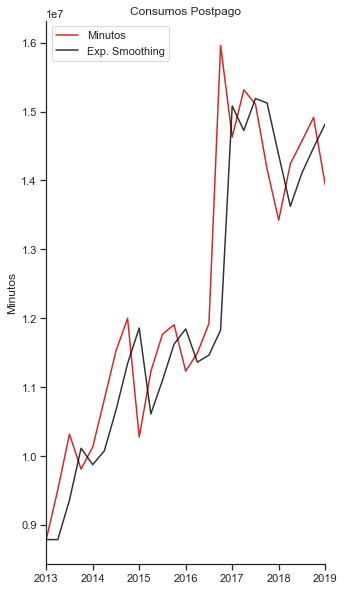

In [28]:
fig, ax= plt.subplots(figsize=(5,10))
y1.plot(color=red, label='Minutos')
fitted_values_1.plot(color='black', label='Exp. Smoothing', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos')
ax.set_title('Consumos Postpago')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

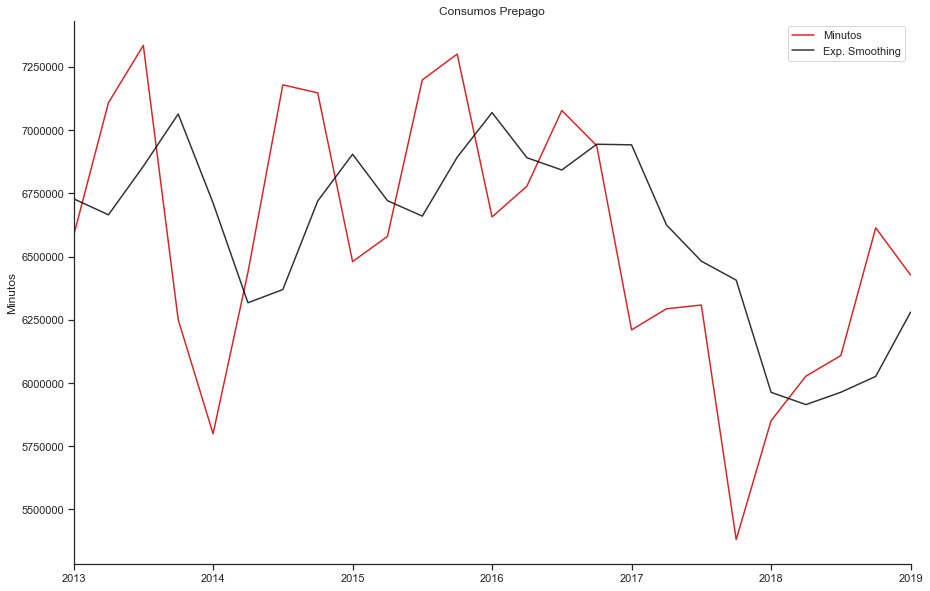

In [29]:
fig, ax= plt.subplots(figsize=(15,10))
y2.plot(color=red, label='Minutos')
fitted_values_2.plot(color='black', label='Exp. Smoothing', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos')
ax.set_title('Consumos Prepago')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

### Análisis del Modelo
 * Análisis Residuos Pospago

In [30]:
resid_pos=y1-fitted_values_1

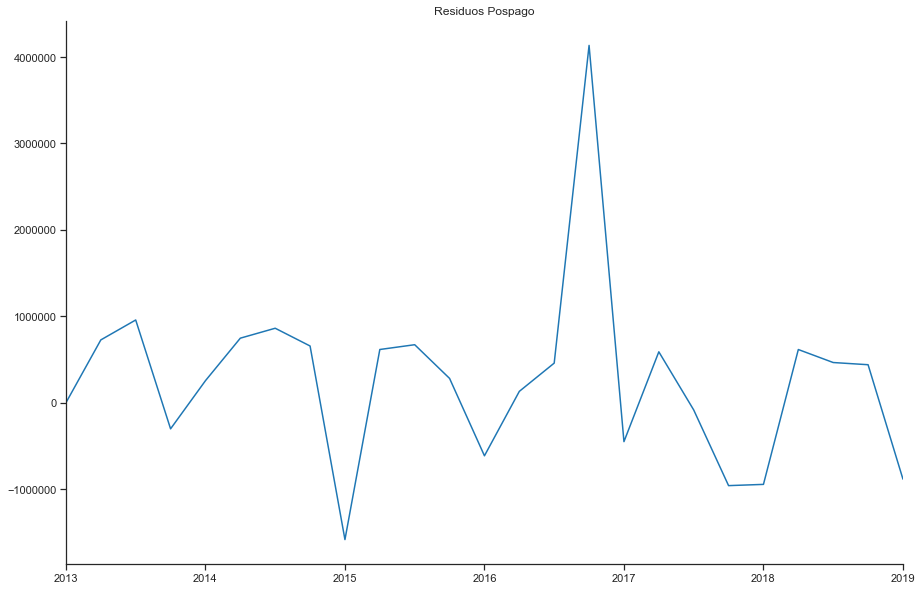

In [31]:
fig, ax= plt.subplots();
resid_pos.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residuos Pospago')
sns.despine()
plt.show()

Se puede observar que los residuos no tienen tendencia. Se gráfica la autocorrelación de los residuos y no hay lags con gran grado de correlación.

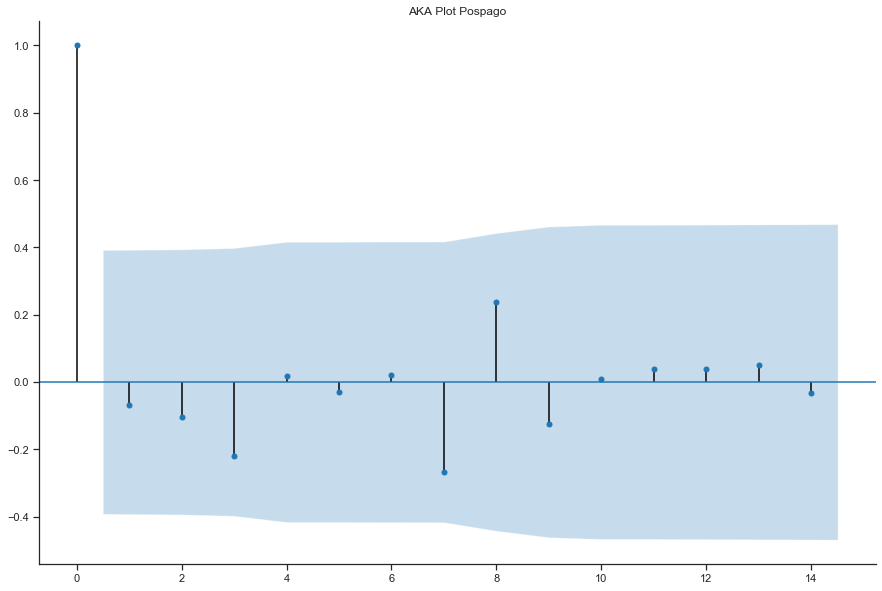

In [32]:
fig, ax_pos = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid_pos, ax=ax_pos)
ax_pos.set_title('AKA Plot Pospago')
sns.despine()
plt.show()

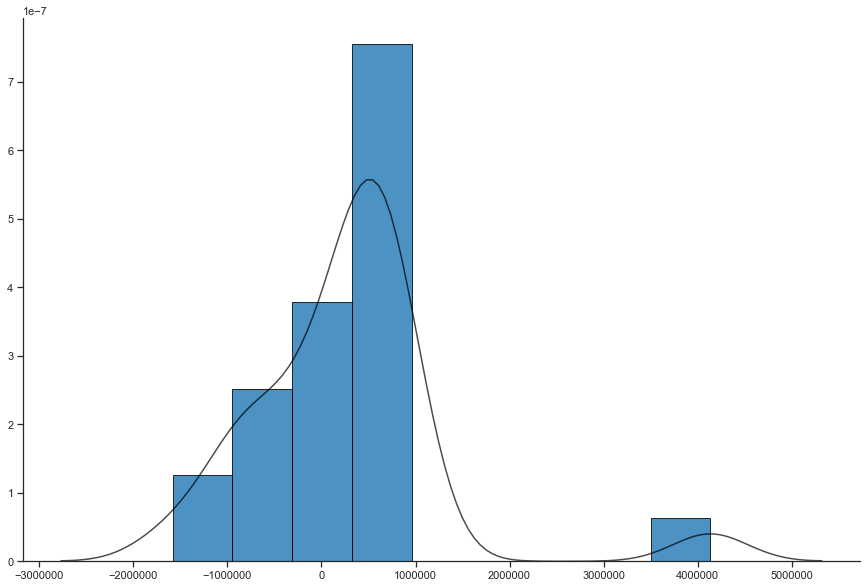

In [33]:
def hist(series):
    fig, ax_pos= plt.subplots();
    sns.distplot(series, ax=ax_pos, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax_pos

hist(resid_pos)
plt.show()

* Análisis Residuos Prepago

In [34]:
resid_pre=y2-fitted_values_2

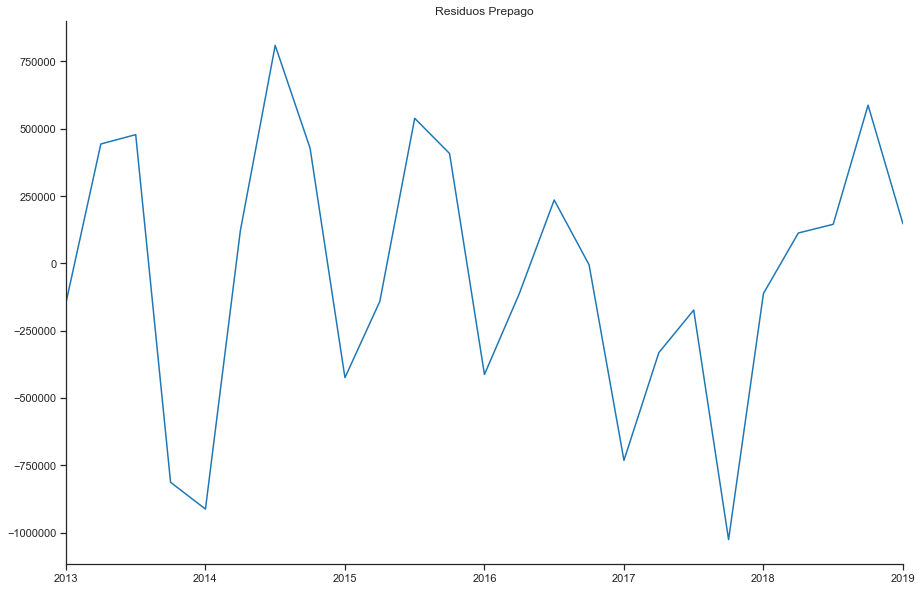

In [35]:

fig, ax_pre= plt.subplots();
resid_pre.plot(color=blue)
ax_pre.set_xlabel('')
ax_pre.set_xticks([], minor=True) 
ax_pre.set_title('Residuos Prepago')
sns.despine()
plt.show()

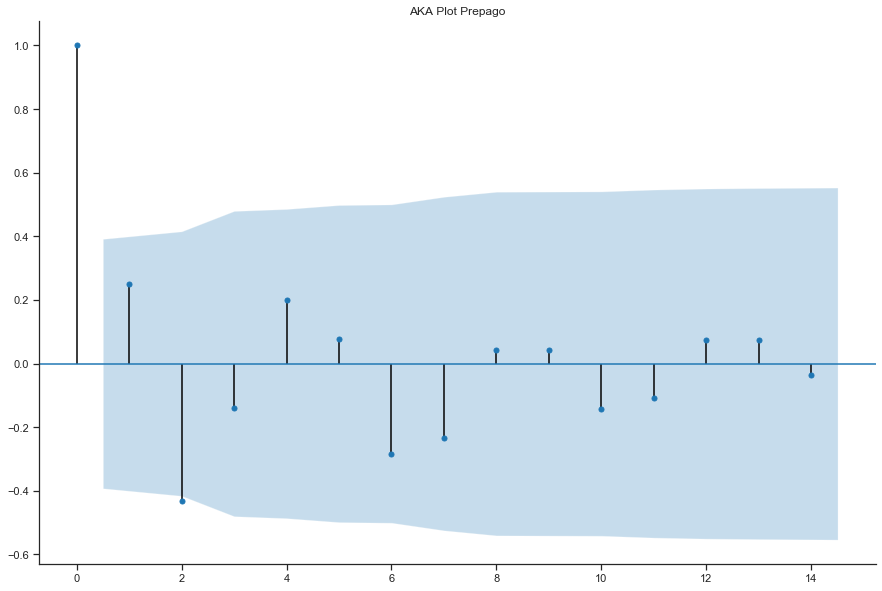

In [36]:
fig, ax_pre = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid_pre, ax=ax_pre)
ax_pre.set_title('AKA Plot Prepago')
sns.despine()
plt.show()

Se observa en este caso igualmente que no existe tendencia ni lags con alta correlación.

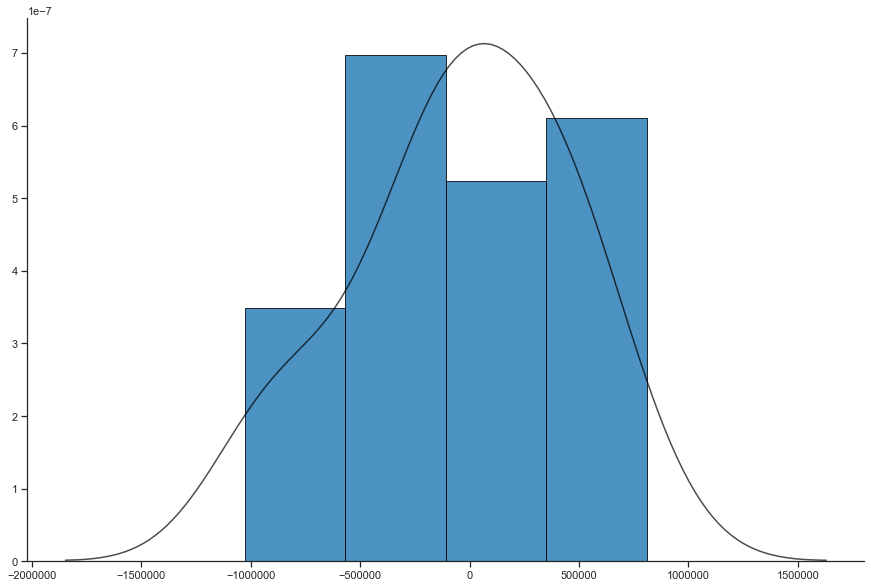

In [37]:
hist(resid_pre)
plt.show()

### Validación del Modelo

Comparamos el modelo de random walk y simple smoothing

* Serie Pospago

In [38]:
(y1.index.get_loc('2018Q1')-1)/len(y1)

0.76

In [39]:
validation_pos=y1['2018Q1':].index
start_pos = y1.index.get_loc('2018Q1')

pred1 = []
pred2 = []
actual= []
for i in range(start_pos, len(y1)):
    
    actual.append(y1.iloc[i]) # actual value
    
    pred1.append(y1.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y1.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation_pos)

In [40]:
from scipy import stats

table_pos = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table_pos.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table_pos.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table_pos.round(3)

,RMSE,SE
RW,692782.157,345644.634
SES,711398.717,354483.807


In [41]:
(y2.index.get_loc('2018Q1')-1)/len(y2)

0.76

In [42]:
validation_pre = y2['2018Q1':].index
start_pre = y2.index.get_loc('2018Q1')

pred1 = []
pred2 = []
actual= []
for i in range(start_pre, len(y2)):
    
    actual.append(y2.iloc[i]) # actual value
    
    pred1.append(y2.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y2.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation_pre)
results_sm.tail()

,RW,SES,Actual
Quarter,,,
2018Q1,5380710.0,6.652112e+06,5850985.0
2018Q2,5850985.0,5.888814e+06,6027374.0
2018Q3,6027374.0,5.961298e+06,6108477.0
2018Q4,6108477.0,6.026811e+06,6613685.0
2019Q1,6613685.0,6.264996e+06,6427084.0


In [43]:
from scipy import stats

table_pre = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table_pre.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table_pre.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table_pre.round(3)

,RMSE,SE
RW,331331.981,128437.669
SES,458989.966,228303.252


### Forecast - Expanding y rolling forecast

* Serie Pospago

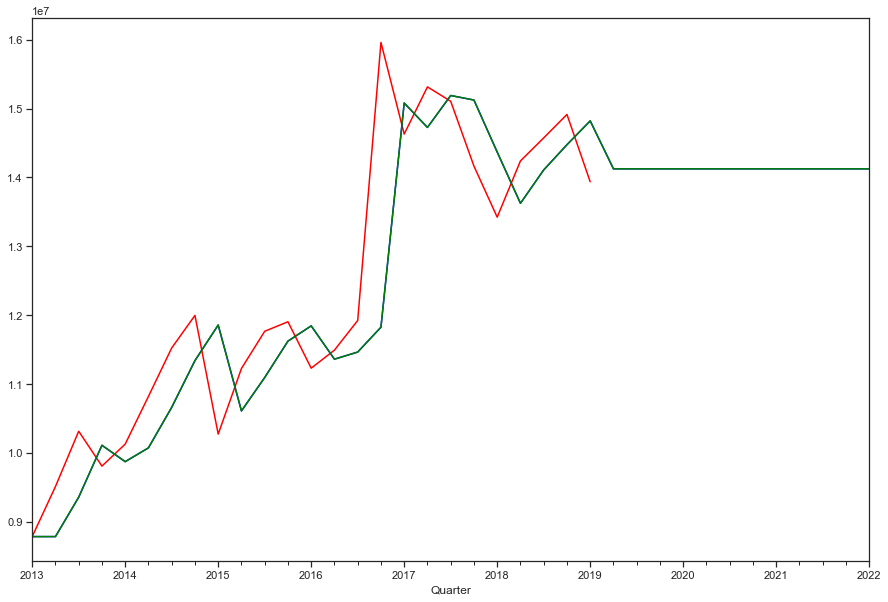

In [44]:
h_pos=12
w_pos=h_pos*10
data_pos = y1
model = sm.tsa.SimpleExpSmoothing
pred_index = y1.index[-1] + np.array(range(1,h_pos+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h_pos):
    current_exp = pd.concat([data_pos, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data_pos, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w_pos)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data_pos[-w_pos:].plot(color='red');
pd.concat([orig_fit[-w_pos:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w_pos:],pred_rolling]).plot(ax=ax,color='green');

* Serie Prepago

C:\Users\femancus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\femancus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\femancus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\femancus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\femancus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


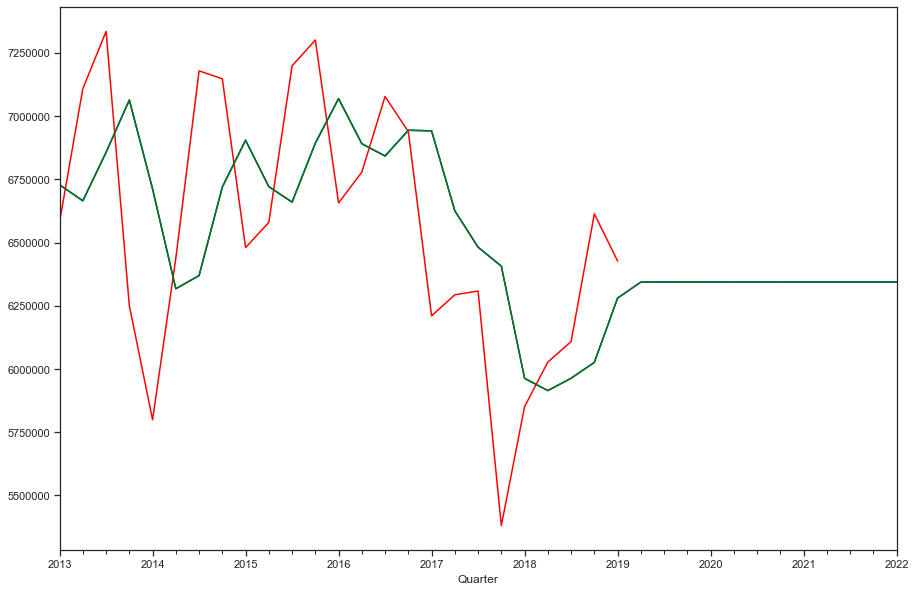

In [45]:
h_pre=12
w=h_pre*10
data = y2
model = sm.tsa.SimpleExpSmoothing
pred_index = y2.index[-1] + np.array(range(1,h_pre+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h_pre):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');